## Ford-Fulkerson Algorithm

In [2]:
import graphviz as gv
import numpy as np

def adjmShow(M, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(M)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  for u in range(n):
    for v in range(0 if directed else u, n):
      if weighted:
        if not np.isnan(M[u, v]):
          g.edge(str(u), str(v), f"{M[u, v]:.0f}")
      else:
        if M[u, v] == 1:
          g.edge(str(u), str(v))
  return g
def adjlShow(L, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

In [1]:
%%file FordFullkerson.txt
1|16 3|13
2|12 3|10
3|9 5|20
1|4 4|14
2|7 5|4


Writing FordFullkerson.txt


23


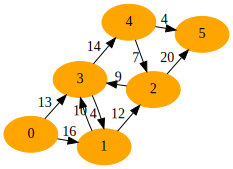

In [4]:
def FordFulkerson(graph,start,end):
    n = len(graph)
    GPrime = [[None]*n for _ in range(n)]
    for v in range(n):
        for u, w in graph[v]:
            GPrime[v][u] = w
    for v in range(n):
        for u in range(n):
            if GPrime[v][u] != None and GPrime[u][v] == None:
                GPrime[u][v] = 0
    def dfs():
        stop = [False]
        minimum = [float("inf")]
        visited = [False]*n
        def _dfs(current):
            if current == end:
                stop[0] = True
                return
            visited[current] = True
            mini = minimum[0]
            for i, w in enumerate(GPrime[current]):
                if w != None and not visited[i] and w != 0:
                    minimum[0] = min(minimum[0],w)
                    _dfs(i)
                    if not stop[0]:
                        minimum[0] = mini
                    else:
                        GPrime[current][i] -= minimum[0]
                        GPrime[i][current] += minimum[0]
                        break
        _dfs(start)
        return minimum[0], stop[0]
    peakFlow = 0
    while True:
        minCapacity, wasReached = dfs()
        if not wasReached:
            break
        peakFlow += minCapacity
    return peakFlow          
graph, _ = readAdjl("FordFullkerson.txt",weighted=True)
graph.append([])
print(FordFulkerson(graph,0,5))
adjlShow(graph,directed=True,weighted=True)

In [ ]:
!